In [1]:
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\shivani\Downloads\age_of_marriage_data.csv")

In [3]:
df

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
...,...,...,...,...,...,...,...,...,...,...
2562,2563,female,"5'3""",Hindu,Thakur,Hindi,Banking Professional,Agra,India,27.0
2563,2564,male,"5'11""",Hindu,Thakur,Hindi,Software Professional,Ottawa,Canada,31.0
2564,2565,female,"5'3""",Hindu,Baishya,Bengali,Software Consultant,Bengaluru / Bangalore,India,28.0
2565,2566,female,"4'11""",NaN,others,Telugu,Not working,Hyderabad,India,26.0


In [4]:
df.head(10)

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
5,6,male,"5'5""",Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0
6,7,female,"5'2""",Hindu,Rajput - Lodhi,Hindi,Banking Professional,Jodhpur,India,28.0
7,8,male,"5'5""",Hindu,Bhatia,Punjabi,Entrepreneurs / Business,Faridabad,India,30.0
8,9,female,"5'5""",Jain,Shwetamber,Gujarati,Software Professional,Vadodara,India,35.0
9,10,female,"5'1""",Hindu,Billava,Tulu,HR Professional,Bengaluru / Bangalore,India,32.0


In [5]:
df.isna().sum()

id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

In [6]:
df.describe()

,id,age_of_marriage
count,2567.000000,2548.000000
mean,1284.000000,29.648352
std,741.173394,2.802414
min,1.000000,20.000000
25%,642.500000,28.000000
50%,1284.000000,30.000000
75%,1925.500000,32.000000
max,2567.000000,36.000000


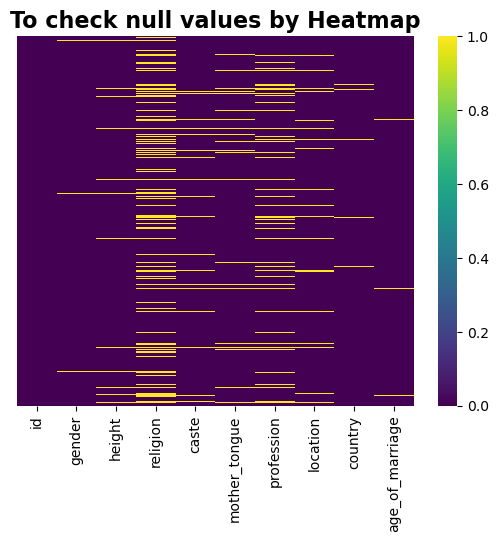

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap="viridis")
plt.title('To check null values by Heatmap',fontsize=16, fontweight='bold')

plt.show()

In [8]:
df.dtypes

id                   int64
gender              object
height              object
religion            object
caste               object
mother_tongue       object
profession          object
location            object
country             object
age_of_marriage    float64
dtype: object

In [9]:
df["gender"]=df["gender"].ffill()

In [10]:
df["gender"].isna().sum()

0

In [11]:
df["height"]=df["height"].ffill()

In [12]:
df['height'] = df['height'].astype(str).str.replace("'", '.')

In [13]:
df['height'] = df['height'].astype(str).str.replace('"','')

In [14]:
df["height"].isna().sum()

0

In [15]:
df[["height"]]

,height
0,5.4
1,5.7
2,5.7
3,5.0
4,5.5
...,...
2562,5.3
2563,5.11
2564,5.3
2565,4.11


In [16]:
df['height'].astype("float")

0       5.40
1       5.70
2       5.70
3       5.00
4       5.50
        ... 
2562    5.30
2563    5.11
2564    5.30
2565    4.11
2566    5.20
Name: height, Length: 2567, dtype: float64

In [17]:
ls = []
for i in df['height']:
    text = float(i)
    ls.append(text)
    
    

In [18]:
df['height']=ls

In [19]:
df["height"]=df["height"].astype("float")

In [20]:
df["height"].mean()

5.37403194390339

# To check outliers present in height by boxplot.....

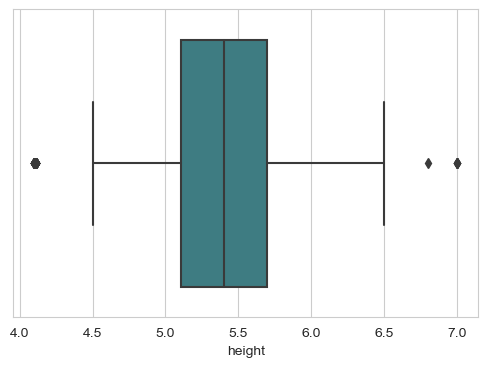

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.boxplot(x='height',data=df,palette='crest')
plt.show()

In [22]:
Mini= df["height"].min()
Q1= df["height"].quantile(0.25)
Q2= df["height"].quantile(0.50)
Q3= df["height"].quantile(0.75)
Max= df["height"].max()

IQR= Q3-Q1
upper_fence= Q3+(1.5*IQR)
lower_fence= Q1-(1.5*IQR)

In [23]:
print("upper=",upper_fence)
print("lower=",lower_fence)

upper= 6.585
lower= 4.2250000000000005


In [24]:
df[df["height"]<lower_fence]

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
65,66,female,4.11,Hindu,Scheduled Caste (SC),Hindi,Accounting Professional (Others),Mumbai,India,34.0
151,152,female,4.11,Hindu,Brahmin,Marathi,Software Consultant,Vadodara,India,29.0
178,179,female,4.11,Hindu,Scheduled Caste (SC),Punjabi,Teacher,Rupnagar,India,34.0
205,206,female,4.11,Hindu,Arya Vysya,Assamese,Not Specified,Delhi,India,25.0
231,232,female,4.10,Hindu,Baishnab,Bengali,Not Specified,Alipore,India,25.0
296,297,female,4.10,Hindu,Patel,Gujarati,Not working,Surat,India,28.0
366,367,female,4.11,NaN,others,NaN,NaN,Mumbai,India,28.0
455,456,female,4.10,Sikh,Khatri,Punjabi,Not Specified,Kanpur,India,31.0
473,474,male,4.11,Hindu,Vaishnav,Gujarati,Writer,Bhavnagar,India,30.0
552,553,female,4.11,Hindu,Lingayath,Marathi,Accounting Professional (Others),Pune,India,31.0


In [25]:
df[df["height"]>upper_fence]

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
1280,1281,female,6.8,NaN,others,Hindi,NaN,NaN,India,27.0
1340,1341,female,7.0,NaN,others,Tamil,NaN,Erode,India,29.0
1943,1944,female,7.0,Hindu,Vanniyar,Tamil,Admin Professional,Pondicherry,India,30.0
2102,2103,female,7.0,Hindu,Bhandari,Konkani,Not working,Honnavar,India,30.0
2103,2104,male,7.0,NaN,NaN,NaN,Software Consultant,NaN,India,27.0
2316,2317,female,7.0,Hindu,Brahmin,Tamil,Not Specified,Bengaluru / Bangalore,India,29.0


In [26]:
df.loc[df["height"]<lower_fence,"height"]=5.2

In [27]:
df[df["height"]<lower_fence]

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage


In [28]:
df.loc[df["height"]>upper_fence,"height"]=6.1

In [29]:
df[df["height"]>upper_fence]

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage


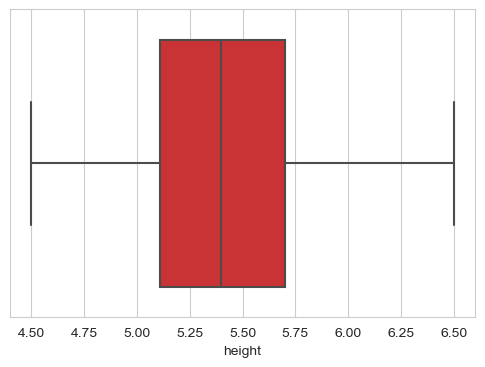

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.boxplot(x='height',data=df,palette='Paired_r')
plt.show()

In [31]:
df["religion"]=df["religion"].bfill()

In [32]:
df["caste"]=df["caste"].ffill()

In [33]:
df["mother_tongue"]=df["mother_tongue"].ffill() 

In [34]:
df["profession"]=df["profession"].bfill()

In [35]:
df["location"]=df["location"].ffill()

In [36]:
df["country"]=df["country"].ffill()

In [37]:
df["age_of_marriage"]=df["age_of_marriage"].ffill()

In [38]:
df.isna().sum()

id                 0
gender             0
height             0
religion           0
caste              0
mother_tongue      0
profession         0
location           0
country            0
age_of_marriage    0
dtype: int64

# To check outliers in age_of_marriage

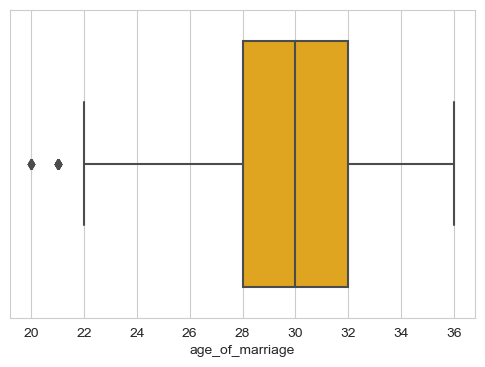

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.boxplot(x='age_of_marriage',data=df,palette='prism_r')
plt.show()

In [40]:
Mini= df["age_of_marriage"].min()
Q1= df["age_of_marriage"].quantile(0.25)
Q2= df["age_of_marriage"].quantile(0.50)
Q3= df["age_of_marriage"].quantile(0.75)
Max= df["age_of_marriage"].max()

IQR= Q3-Q1
upper_fence= Q3+(1.5*IQR)
lower_fence= Q1-(1.5*IQR)

In [41]:
print("upper=",upper_fence)
print("lower=",lower_fence)

upper= 38.0
lower= 22.0


In [42]:
df[df["age_of_marriage"]<lower_fence]

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,5.40,Jain,others,Telugu,Doctor / Healthcare Professional,London,United Kingdom,21.0
21,22,female,4.50,Hindu,others,Bengali,Not working,Midnapore,India,20.0
157,158,female,5.30,Hindu,others,Bengali,Mechanical / Production Engineer,Midnapore,India,20.0
373,374,female,4.50,Hindu,others,Hindi,Not Specified,Bihar Sharif,India,21.0
539,540,male,5.30,Hindu,others,Telugu,Admin Professional,Chennai,India,21.0
781,782,male,5.00,Hindu,others,Tamil,Mechanical / Production Engineer,Pilibhit,India,21.0
852,853,male,4.50,Hindu,others,Hindi,Medical / Healthcare Professional (Others),Haveri,India,21.0
856,857,male,5.11,Sikh,others,Hindi,Actor,Bihar Sharif,India,21.0
1029,1030,female,5.80,Hindu,others,Marathi,Dentist,Akola,India,21.0
1066,1067,female,5.40,Jain,others,Telugu,Managers and Senior Executives,Mumbai,India,20.0


In [43]:
df[df["age_of_marriage"]>upper_fence]

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage


In [44]:
df.loc[df["age_of_marriage"]<lower_fence,"age_of_marriage"]=24

In [45]:
df[df["age_of_marriage"]<lower_fence]

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage


#  Exploratory Data Analysis

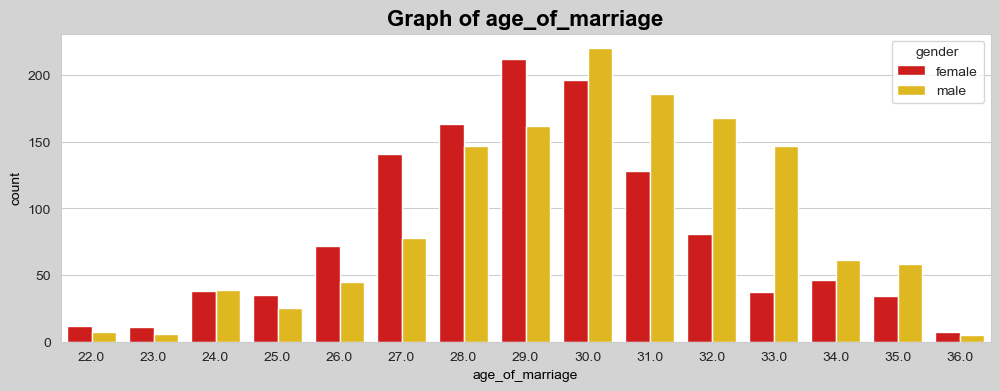

In [46]:
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
sns.countplot(x='age_of_marriage',hue='gender',data=df,palette='hot')
plt.gcf().set_facecolor('lightgrey')
plt.title('Graph of age_of_marriage',color="black",fontsize=16,fontweight='bold')
plt.xlabel('age_of_marriage',color="black")
plt.ylabel('count',color="black")
plt.show()

Text(0, 0.5, 'Density')

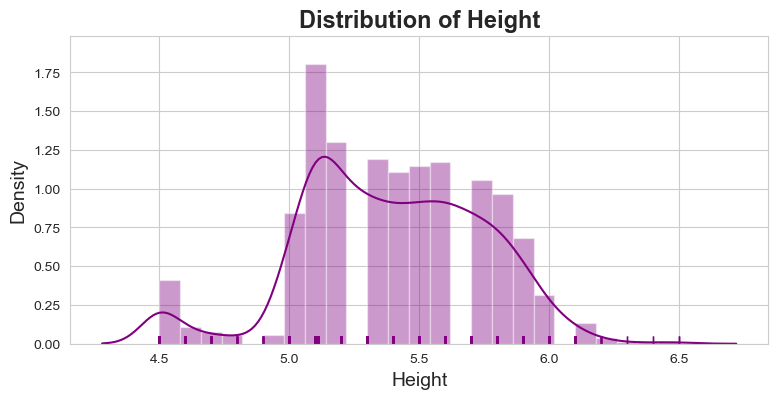

In [47]:
plt.figure(figsize=(9,4))
sns.set_style('whitegrid')
sns.distplot(df['height'],bins=25,color="purple",rug=True)
#sns.distplot(df['height'],bins=[4.5,5.0,5.5,6.0,6.5],color="purple")
plt.title('Distribution of Height',fontsize=17,fontweight='bold')
plt.xlabel('Height',fontsize=14)
plt.ylabel('Density',fontsize=14)

<Axes: >

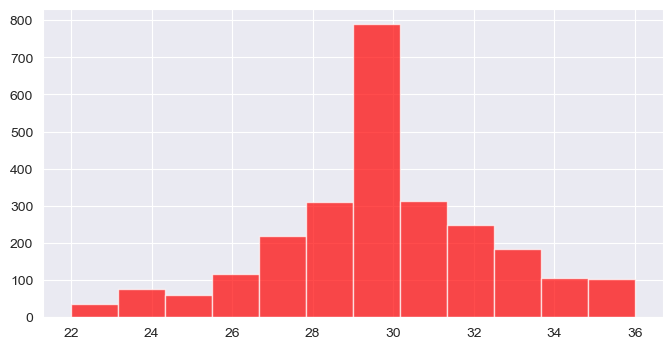

In [48]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
df['age_of_marriage'].hist(bins=12,color='red',alpha=0.70)

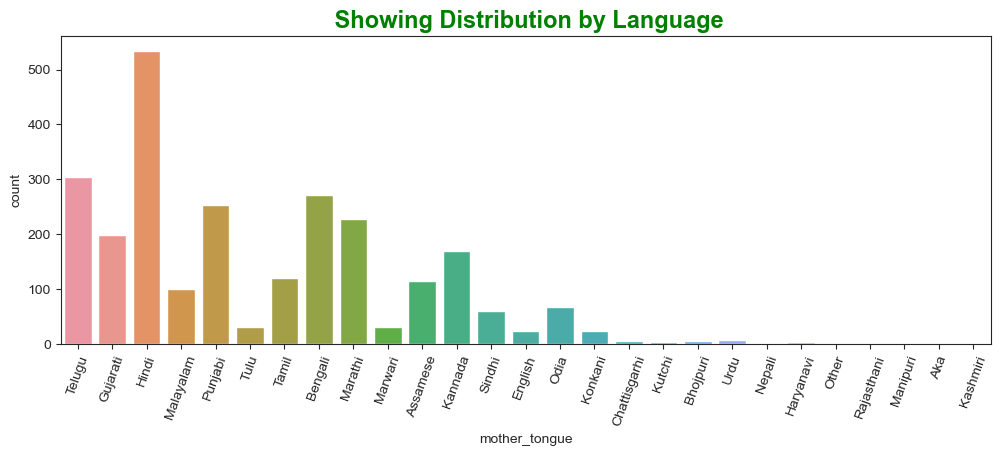

In [49]:
plt.figure(figsize=(12,4))
sns.set_style("ticks")
sns.countplot(x='mother_tongue',data=df)
plt.title(' Showing Distribution by Language',color="green",fontsize=17,fontweight='bold')
plt.xticks(rotation=70)
plt.show()

Text(0, 0.5, 'Count')

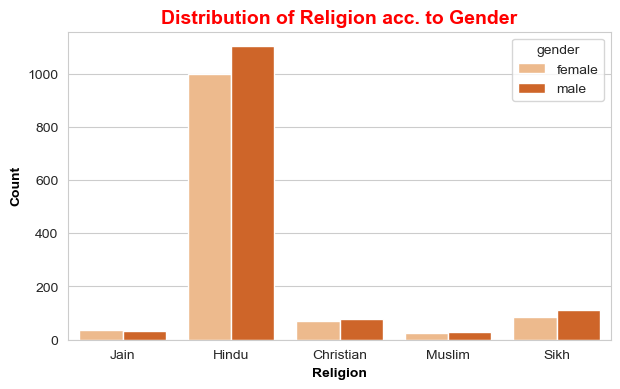

In [50]:
plt.figure(figsize=(7,4))
sns.set_style("whitegrid")
sns.countplot(x="religion",data=df,hue="gender",palette="Oranges",alpha=1)
plt.title('Distribution of Religion acc. to Gender',color="red",fontsize=14,fontweight='bold')
plt.xlabel('Religion',color="black",fontweight='bold')
plt.ylabel('Count',color="black",fontweight='bold')

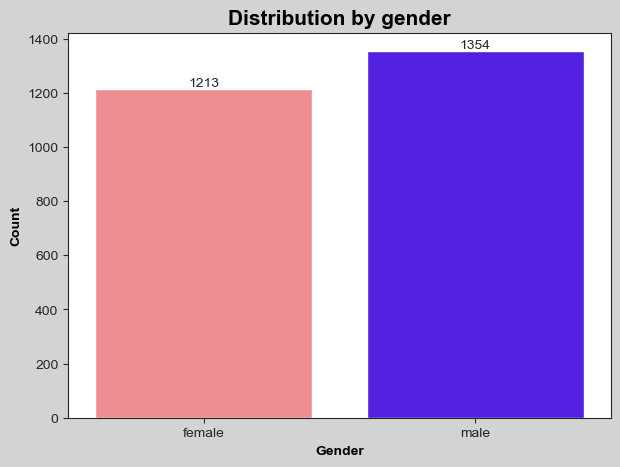

In [51]:
plt.figure(figsize=(7,5))
sns.set_style('ticks')
ax=sns.countplot(x='gender',data=df,palette='gnuplot2_r',color='black')
plt.gcf().set_facecolor('lightgrey')
plt.title('Distribution by gender',color='black',fontsize=15,fontweight='bold')
plt.xlabel('Gender',color='black',fontweight='bold')
plt.ylabel('Count',color='black',fontweight='bold')
#sns.set_context("paper")

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

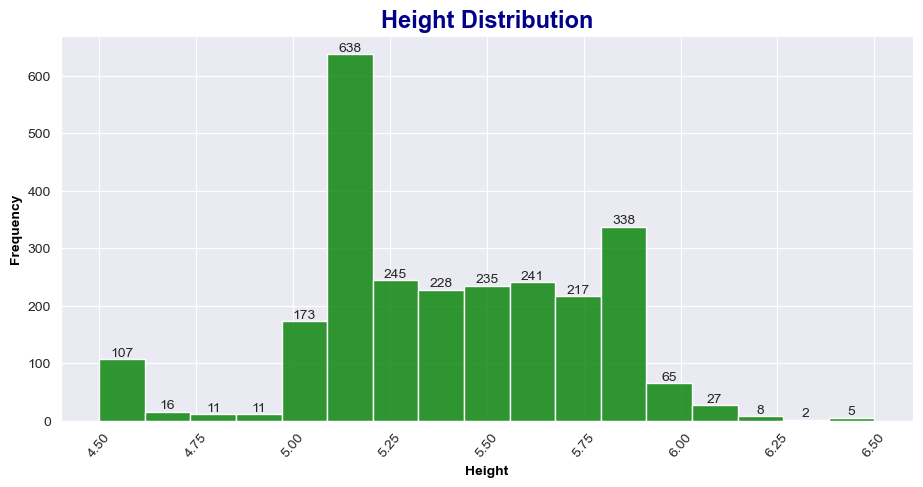

In [52]:
plt.figure(figsize=(11,5))
sns.set_style("darkgrid")
ax=sns.histplot(df["height"],palette="prism_r",bins=17,color="green",alpha=0.80)
plt.xticks(rotation=50)
plt.title('Height Distribution',color="darkblue",fontsize=17,fontweight='bold')
plt.xlabel('Height',color="black",fontweight='bold')
plt.ylabel('Frequency',color="black",fontweight='bold')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


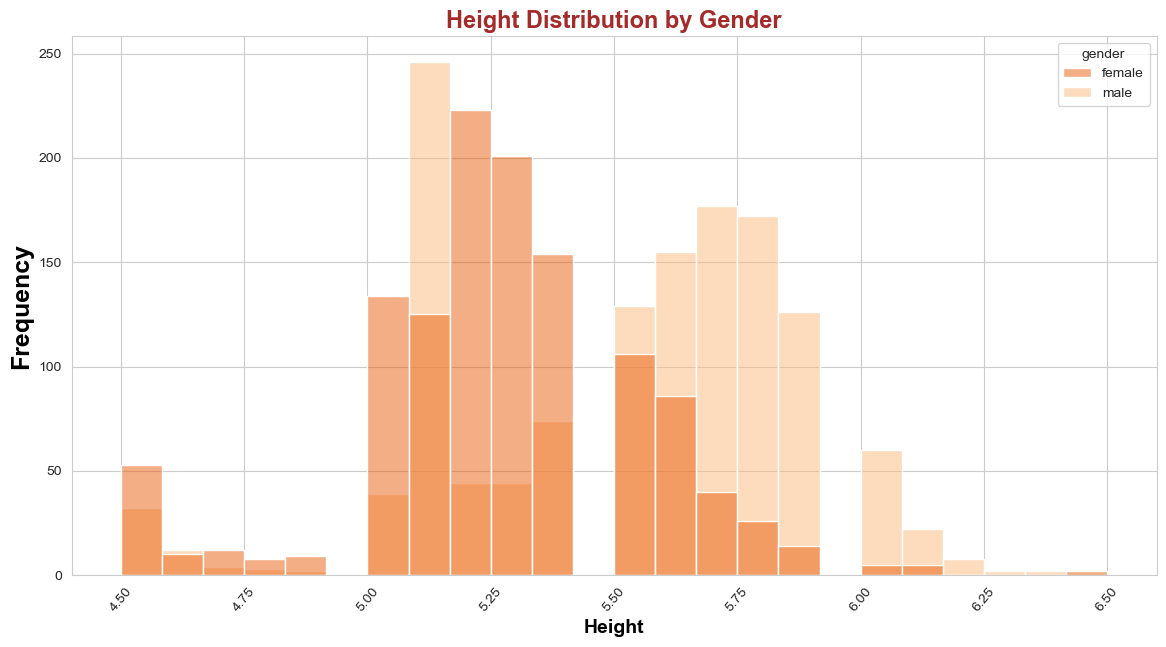

In [53]:
plt.figure(figsize=(14,7))

sns.set_style("whitegrid")
sns.histplot(x="height",hue="gender",palette="Oranges_r",data=df)
plt.xticks(rotation=50)
plt.title('Height Distribution by Gender',color="brown",fontsize=17,fontweight='bold')
plt.xlabel('Height',color="black",fontweight='bold',fontsize=14)
plt.ylabel('Frequency',color="black",fontweight='bold',fontsize=18)

plt.show()

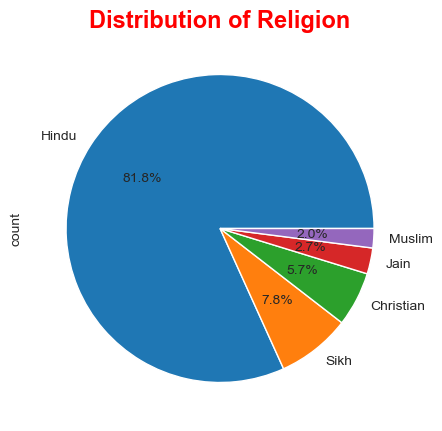

In [54]:
df['religion'].value_counts().plot(kind="pie",y="caste",autopct="%1.1f%%",figsize=(6,5))
plt.title('Distribution of Religion',color="red",fontsize=17,fontweight='bold')
plt.show()

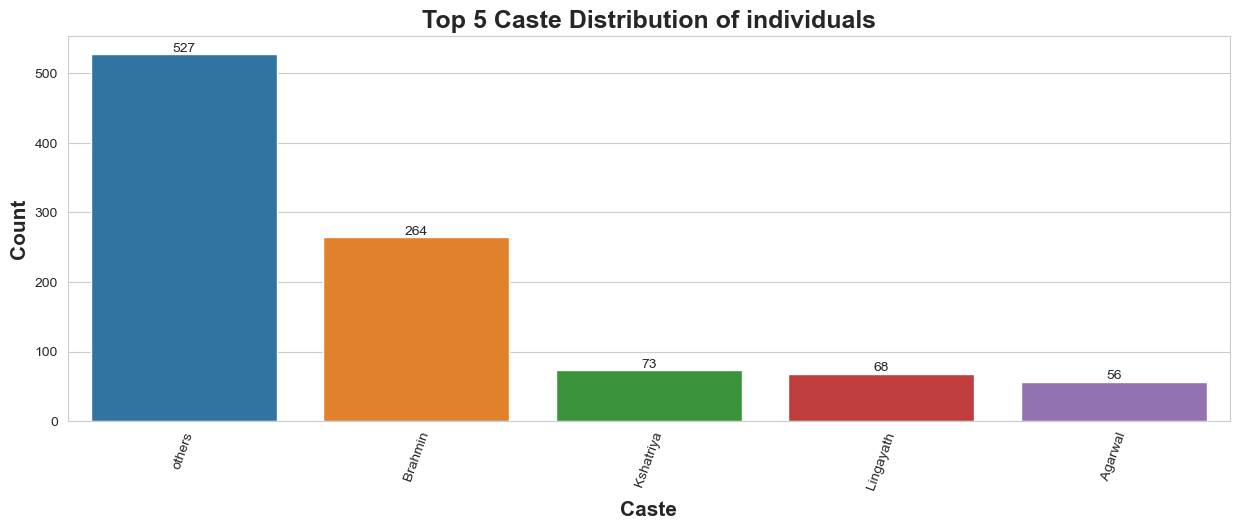

In [55]:
plt.figure(figsize=(15,5))
top_5_castes = df['caste'].value_counts().nlargest(5).index
df_top_5 = df[df['caste'].isin(top_5_castes)]

ax=sns.countplot(x='caste',data=df_top_5, order=top_5_castes)
plt.xticks(rotation=70)
plt.title('Top 5 Caste Distribution of individuals',fontsize=18,fontweight='bold')
plt.xlabel('Caste',fontweight='bold',fontsize=15)
plt.ylabel('Count',fontweight='bold',fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

<Axes: >

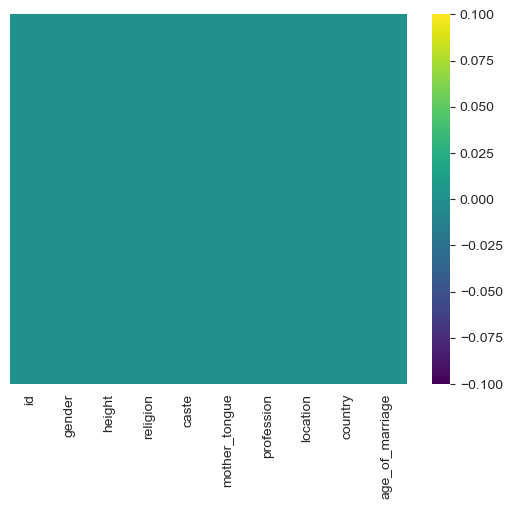

In [56]:
# To check null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap="viridis")


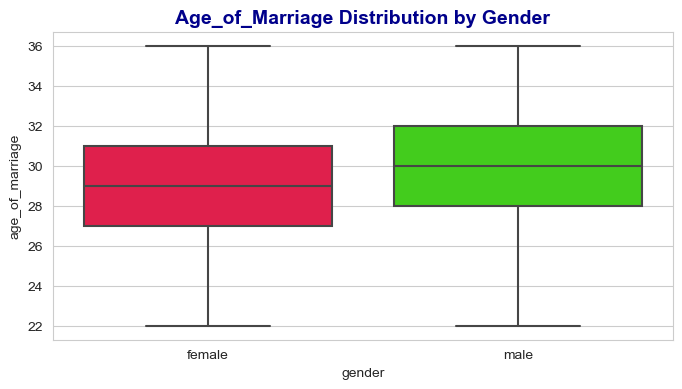

In [57]:
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.boxplot(x="gender",y="age_of_marriage",data=df,palette="prism_r")
plt.title('Age_of_Marriage Distribution by Gender', color="darkblue", fontsize=14, fontweight='bold')
plt.show()
# avg value for female is b/w 28 to 30 & male avg value is lie on 30

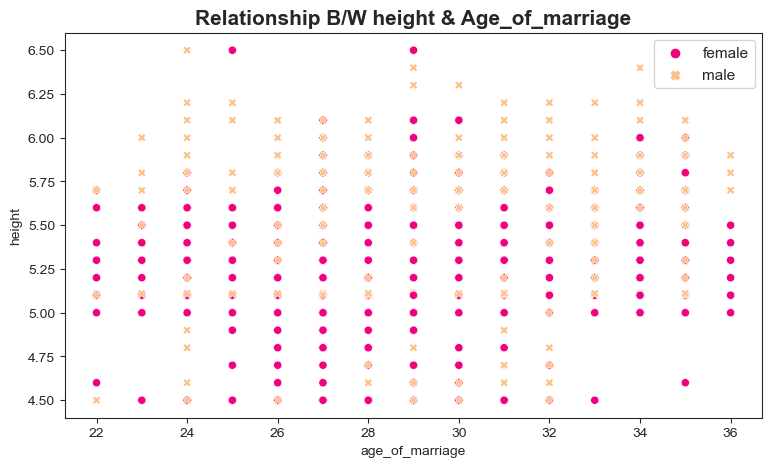

In [70]:
plt.figure(figsize=(9,5))
sns.set_style("ticks")
sns.scatterplot(x="age_of_marriage",y="height",hue="gender",data=df,style='gender',palette='Accent_r')
plt.legend(fontsize=11)
plt.title('Relationship B/W height & Age_of_marriage',fontsize=15,fontweight="bold")
plt.show()